In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [291]:
data = pd.read_excel('iris (2).xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [294]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are missing values in columns SL,SW,PL . So all these values are going to replace with mean values

In [295]:
mean_SL=data['SL'].mean()
mean_SW=data['SW'].mean()
mean_PL=data['PL'].mean()
data['SL'].fillna(value= mean_SL, inplace= True)
data['SW'].fillna(value= mean_SW, inplace= True)
data['PL'].fillna(value= mean_PL, inplace= True)
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,Iris-setosa
1,4.900000,3.0,1.40000,0.2,Iris-setosa
2,5.855944,3.2,1.30000,0.2,Iris-setosa
3,4.600000,3.1,1.50000,0.2,Iris-setosa
4,5.000000,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica
146,6.300000,2.5,5.00000,1.9,Iris-virginica
147,6.500000,3.0,3.75625,2.0,Iris-virginica
148,6.200000,3.4,5.40000,2.3,Iris-virginica


In [296]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [297]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [298]:
data.shape

(150, 5)

Data Preprocessing

In [299]:
#Label encoding for coverting labels in Classification to numeric forms
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [300]:
data.Classification=le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [301]:
#Statistical Summary
data.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667,1.000000
std,0.808480,0.421884,1.725479,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.200000,1.300000,1.000000
75%,6.400000,3.275000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


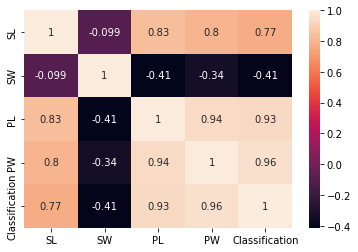

In [302]:
#Correlation between the datas
sns.heatmap(data.corr(), annot = True);

Model Training

In [303]:
y= data['Classification']
X= data.drop(['Classification'],axis=1)

In [317]:
#Standardize the feature values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [320]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size = 0.35)

In [321]:
X_train.shape

(97, 4)

In [322]:
data['Classification'].value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: Classification, dtype: float64

3.Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [323]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [324]:
#Logistic Regression
log_reg= LogisticRegression(random_state=42,max_iter=10000)
log_reg.fit(X_train,y_train)
log_reg_y_pred_train = log_reg.predict(X_train)
log_reg_y_pred_test = log_reg.predict(X_test)
print('Logistic Regression Accuracy score:',accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred))

Logistic Regression Accuracy score: 0.9811320754716981
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        17
           2       1.00      0.94      0.97        17

    accuracy                           0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53



In [325]:
#kNN 
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn= knn.predict(X_test)
print('KNN Accuracy score:',accuracy_score(y_pred_knn,y_test))
print('f1 score is:',f1_score(y_pred_knn,y_test,average='micro'))
print(classification_report(y_test,y_pred))

KNN Accuracy score: 0.9245283018867925
f1 score is: 0.9245283018867925
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        17
           2       1.00      0.94      0.97        17

    accuracy                           0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53



In [326]:
#Decision Tree
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred= dt.predict(X_test)
print('Decision Tree accuracy score:',accuracy_score(dt_pred,y_test))
print('f1 score is:',f1_score(dt_pred,y_test,average='micro'))
print(classification_report(y_test,y_pred))

Decision Tree accuracy score: 0.9811320754716981
f1 score is: 0.9811320754716981
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        17
           2       1.00      0.94      0.97        17

    accuracy                           0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53



In [328]:
#SVM
svm_model = SVC(C=1, kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=1)

In [329]:
svm_y_pred = svm_model.predict(X_test)
print('SVM Accuracy Score:', accuracy_score(y_test, svm_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, svm_y_pred))
print(classification_report(y_test,y_pred))

SVM Accuracy Score: 0.9622641509433962
Confusion Matrix:
 [[18  1  0]
 [ 0 17  0]
 [ 0  1 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        17
           2       1.00      0.94      0.97        17

    accuracy                           0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53



In [330]:
#Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print('Randon Forest Accuracy is:',accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, svm_y_pred))
print(classification_report(y_test,y_pred))

Randon Forest Accuracy is: 0.9811320754716981
Confusion Matrix:
 [[18  1  0]
 [ 0 17  0]
 [ 0  1 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        17
           2       1.00      0.94      0.97        17

    accuracy                           0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53



Above classification models helped to identify the three species of iris plant using four input features.
Models were trained on the training data (65%), and their performance was evaluated using testing data (35%). Approx. accuracy of 98% showed by Logistic Regression Model,Decision Tree model, Randon Forest model. And also the precision is more to identify the iris setosa and Iris-virginica than Iris-versicolor.  